# Assignment 1: Titanic Data Preprocessing


### Importing Required Libraries and Loading Data

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading Dataset

In [ ]:
url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.csv"
df = pd.read_csv(url)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Preprocessing the Data

##### Display Some basic Information of the Dataset

Describe the Datatset

In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Display column names

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Display Data type of each column

In [ ]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Find Number of missing values

In [ ]:
column_names = df.columns
for column in column_names:
  print(column + " - "  + str(df[column].isnull().sum()))

pclass - 0
survived - 0
name - 0
sex - 0
age - 263
sibsp - 0
parch - 0
ticket - 0
fare - 1
cabin - 1014
embarked - 2
boat - 823
body - 1188
home.dest - 564


##### Insights into the Data



*   The targeet variable is - "Survived".
*   Many columns dont contribute to the target variable like :
        1. 'Ticket'
        2. 'Boat'
        3. 'body'
        4. 'home.dest'
    These can be dropped from the datset.

* Also, the column 'Cabin' has many null values and thus cannot contribute to the output. This can also be dropped.
* Some columns do NOT have a null value, like:
        1. 'PClass'
        2. 'Sex'
        3. 'SibSp'
        4. 'Parch'
        5. 'Fare'

* There are a few missing values in the columns 'Age' and 'Embarked'. These can be imputed using different techniques.
* Also we can create a new variable for 'total family size' from the the column 'SibSp' and 'Parch'.







##### Removing Unecessary Columns

In [ ]:
df = df.drop(columns=['ticket', 'cabin', 'boat' ,'body', 'home.dest'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S


##### Handling NULL Values

In [ ]:
df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

Input 'Embarked' with the majority class.

In [ ]:
df['embarked'] = df['embarked'].fillna('S')
df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
dtype: int64

There is one missing value for fare. So allot the median value to that.

In [ ]:
f_NaN_index = df['fare'][df['fare'].isnull()].index

In [ ]:
df['fare'].iloc[f_NaN_index] = df['fare'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

##### Filling in Missing values for 'Age'

First, find columns that are useful to predicy the value of Age. 

In [ ]:
corr_matrix = df[['pclass', 'age', 'sibsp', 'parch', 'fare']].corr()

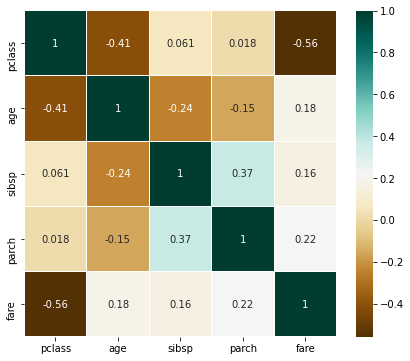

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(data = corr_matrix, cmap = 'BrBG', annot=True, linewidths=0.2)

From above, we can see that age has a negative relation with 'parch', 'sibsp', and 'pclass'.
Therefore, we fill 'age' with median age of similar rows from 'pclass', 'sibsp' and 'parch'. In case there are no similar rows, we fill the median age of the entire dataset.

In [ ]:
NaN_indexes = df['age'][df['age'].isnull()].index

In [ ]:
for i in NaN_indexes:
  pred_age = df['age'][((df.sibsp == df.iloc[i]["sibsp"]) & (df.parch == df.iloc[i]["parch"]) & (df.pclass == df.iloc[i]["pclass"]))].median()
  if not np.isnan(pred_age):
    df['age'].iloc[i] = pred_age
  else:
    df['age'].iloc[i] = df['age'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

##### Handling non-numeric values

In [ ]:
df.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

First, map 'sex' and 'embarked' to numerical values

In [ ]:
df['sex'] = df['sex'].map({'male' : 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C' : 0, 'Q': 1, 'S': 2})
df.dtypes

pclass        int64
survived      int64
name         object
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

##### Handling 'Name' Column

Now, extract the title from 'name' column, and then drop the 'name' column.

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,211.3375,2
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,151.5500,2
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,151.5500,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,151.5500,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,151.5500,2


In [ ]:
df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns='name')
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,1,1,1,29.00,0,0,211.3375,2,Miss
1,1,1,0,0.92,1,2,151.5500,2,Master
2,1,0,1,2.00,1,2,151.5500,2,Miss
3,1,0,0,30.00,1,2,151.5500,2,Mr
4,1,0,1,25.00,1,2,151.5500,2,Mrs


Plotting a bar chart for the 'title' column

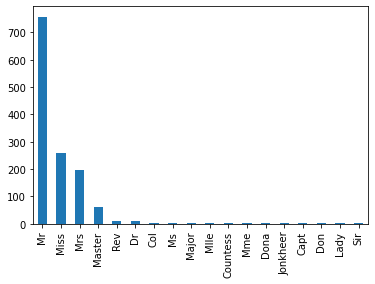

In [ ]:
df.title.value_counts().plot(kind='bar')

Group some of the rare titles into others.

In [ ]:
df['title'] = df['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

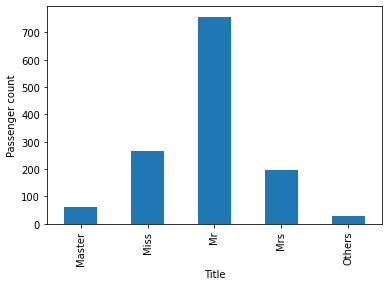

In [ ]:
plt = df.title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

In [ ]:
df.dtypes

pclass        int64
survived      int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
title        object
dtype: object

Mapping 'title' to numeric values.

In [ ]:
df['title'] = df['title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,1,1,1,29.00,0,0,211.3375,2,1
1,1,1,0,0.92,1,2,151.5500,2,0
2,1,0,1,2.00,1,2,151.5500,2,1
3,1,0,0,30.00,1,2,151.5500,2,2
4,1,0,1,25.00,1,2,151.5500,2,3


##### Create new column for 'familysize'

In [ ]:
df['familysize'] = df['sibsp'] + df['parch'] + 1
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,familysize
0,1,1,1,29.00,0,0,211.3375,2,1,1
1,1,1,0,0.92,1,2,151.5500,2,0,4
2,1,0,1,2.00,1,2,151.5500,2,1,4
3,1,0,0,30.00,1,2,151.5500,2,2,4
4,1,0,1,25.00,1,2,151.5500,2,3,4


### Visualising Data

##### Visualising 'Survived Column

We know, majority passengers did not survive. Thus, Data is imbalanced.



Text(0, 0.5, 'Passenger Count')

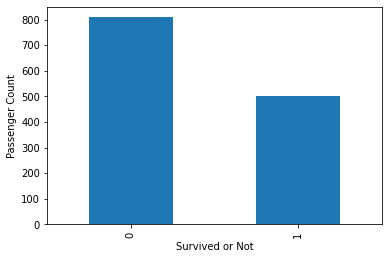

In [ ]:
plt = df.survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count')

##### Survival Probability based on Passenger Class

First, display number of passengers in each class. Majority are in 3rd class. 

Text(0, 0.5, 'Survival Probability')

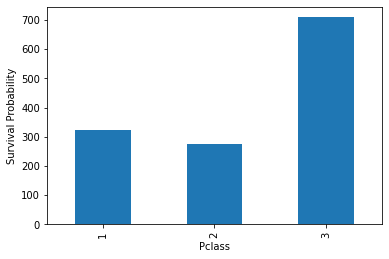

In [ ]:
plt = df.pclass.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Now, plot survival probability based on pclass and survived column.

In [ ]:
df[['pclass', 'survived']].groupby('pclass').count()

,survived
pclass,
1,323
2,277
3,709


In [ ]:
df[['pclass', 'survived']].groupby('pclass').sum()

,survived
pclass,
1,200
2,119
3,181


Text(0, 0.5, 'Survival Probability')

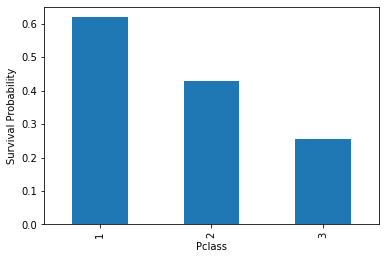

In [ ]:
plt = df[['pclass', 'survived']].groupby('pclass').mean().survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Thus, we can say that 1st class has the highest probability of survival.

##### Sex Survival Probability

First, plot count passenger genders. 

Text(0, 0.5, 'Passenger count')

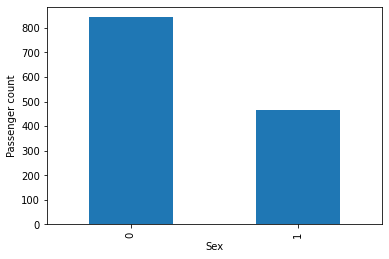

In [ ]:
plt = df.sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

We can see that majority passengers are male.

Text(0, 0.5, 'Survival Probability')

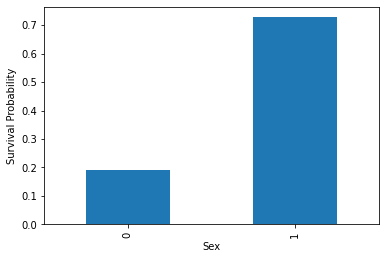

In [ ]:
plt = df[['sex', 'survived']].groupby('sex').mean().survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

Females have higher probability of surviving. They may have been given higher priority.

##### 'Parch' Survival Probability

Text(0, 0.5, 'Passenger count')

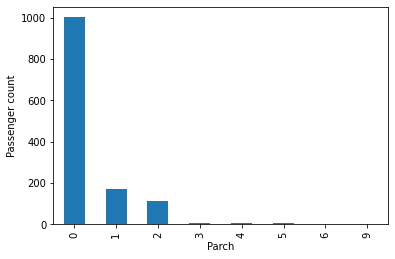

In [ ]:
plt = df.parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

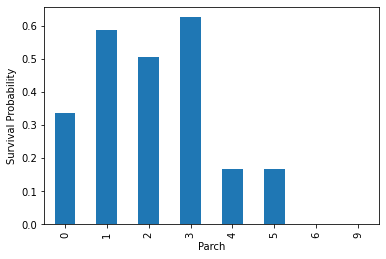

In [ ]:
plt = df[['parch', 'survived']].groupby('parch').mean().survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

Thus, passengers having 3 children/parents have more survival probability.